In [136]:
# The Libraries used
import torch
import torch.nn as nn
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
import io
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from matplotlib import rcParams

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# figure size in inches
rcParams['figure.figsize'] = 22,11

In [3]:
data=files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


# Dataset

In [137]:
df=pd.read_csv(io.StringIO(data['bank-additional-full.csv'].decode('utf-8')), sep = ';') # Dataset stored in a Dataframe

In [138]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.columns # The Columns Present in the DataFrame

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.info() # To see Datatype, No. of Columns, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.isnull().sum() # No Missing Data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df['loan'].unique() # 3 States for Loan

array(['no', 'yes', 'unknown'], dtype=object)

In [10]:
df['y'].unique() # 2 States of Label

array(['no', 'yes'], dtype=object)

In [11]:
df['job'].unique() 

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [12]:
df['job'].nunique() # 12 Types of Jobs

12

In [139]:
# Converting Label to a Dummy Variable
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Analysis & Visualization

In [140]:
# Let's take the Relevant columns of 'age', 'job', 'marital', 'education', 'default', 'housing' &	'loan'
df_sub = df.iloc[: , 0:7] # Subset of 'df' is 'df_sub'
df_sub.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [15]:
df_sub['job'].unique() # 12 Types of Jobs

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [16]:
df_sub['marital'].unique() # 4 Types of Marital Status

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [17]:
df_sub['education'].unique() # 8 Types of Educational Status 

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [18]:
df_sub['default'].unique() # 3 Types of Credit in Default

array(['no', 'unknown', 'yes'], dtype=object)

In [19]:
df_sub['housing'].unique() # 3 Types of Housing Loan Status

array(['no', 'yes', 'unknown'], dtype=object)

In [20]:
df_sub['loan'].unique() # 2 Types of Personal Loan Status

array(['no', 'yes', 'unknown'], dtype=object)

### Age

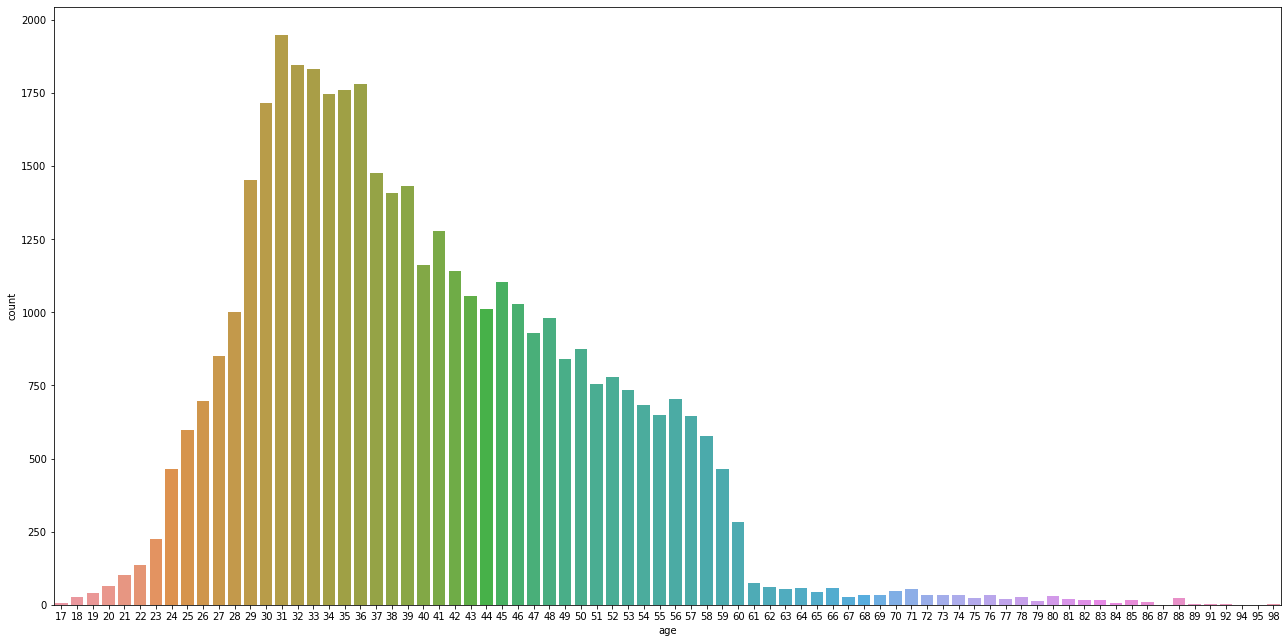

In [141]:
sns.countplot(x='age',data=df_sub) # A Countplot of Age

In [22]:
df_sub['age'].max() # Oldest Age -> 98

98

In [23]:
df_sub['age'].min() # Youngest Age -> 17

17

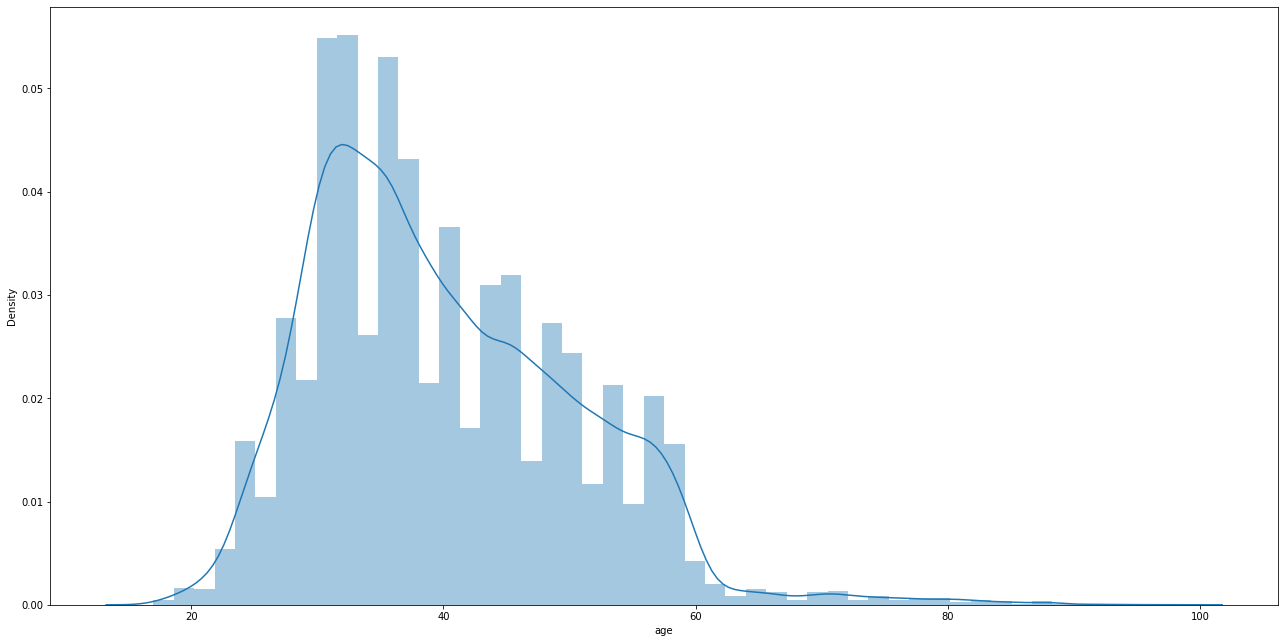

In [142]:
sns.distplot(df_sub['age']) # A Distribution Plot of Age with Density 

In [25]:
round(df_sub['age'].mean()) # Average Age is 40 yrs old

40

In [26]:
df_sub['age'].std() # Standard Deviation of 10.42 

10.421249980934048

In [27]:
# Quartiles Needed to Calculate the Outliers
print('1st Quartile: ', df_sub['age'].quantile(q = 0.25)) # 1st Quartile
print('2nd Quartile: ', df_sub['age'].quantile(q = 0.50)) # 2nd Quartile
print('3rd Quartile: ', df_sub['age'].quantile(q = 0.75)) # 3rd Quartile
print('4th Quartile: ', df_sub['age'].quantile(q = 1.00)) # 4th Quartile
# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Outliers: ', df_sub['age'].quantile(q = 0.75) + 1.5*(df_sub['age'].quantile(q = 0.75) - df_sub['age'].quantile(q = 0.25)))

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
Outliers:  69.5


### Job

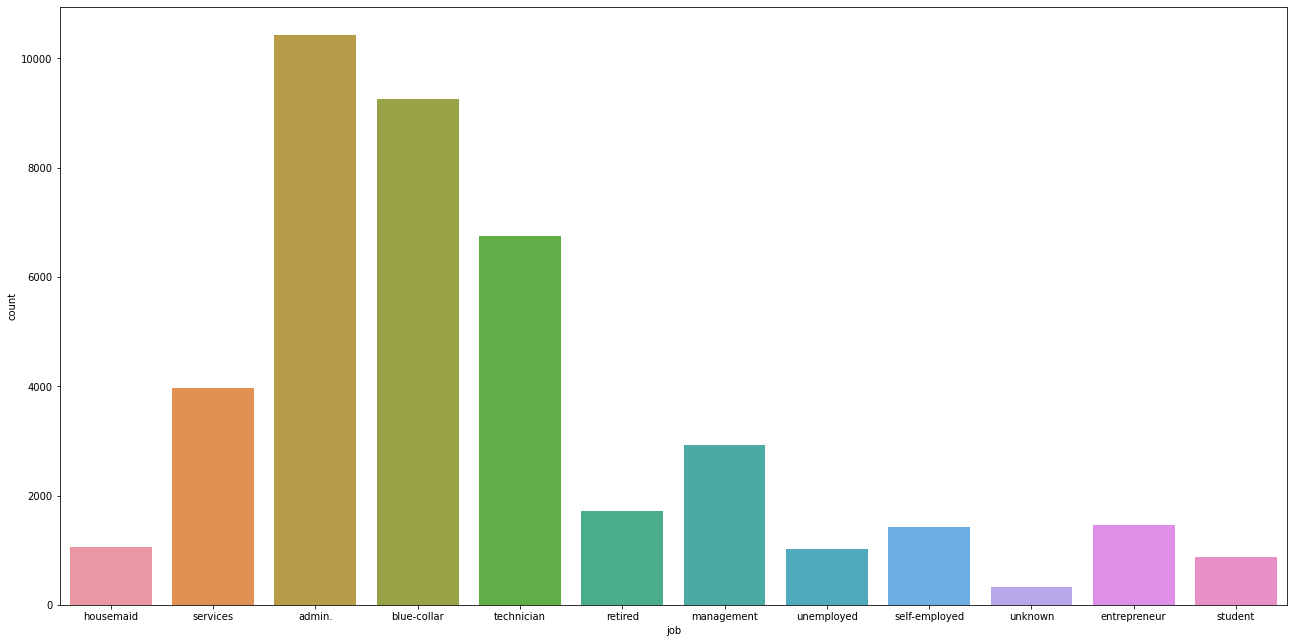

In [143]:
sns.countplot(x='job',data=df_sub) # A Countplot of Job

In [29]:
print("HouseMaid %     -> ",round(100*len(df_sub[df_sub['job']=="housemaid"])/len(df_sub),3))
print("Services %      -> ",round(100*len(df_sub[df_sub['job']=="services"])/len(df_sub),3))
print("Admin %         -> ",round(100*len(df_sub[df_sub['job']=="admin."])/len(df_sub),3))
print("Blue-Collar %   -> ",round(100*len(df_sub[df_sub['job']=="blue-collar"])/len(df_sub),3))
print("Technician %    -> ",round(100*len(df_sub[df_sub['job']=="technician"])/len(df_sub),3))
print("Retired %       -> ",round(100*len(df_sub[df_sub['job']=="retired"])/len(df_sub),3))
print("Management %    -> ",round(100*len(df_sub[df_sub['job']=="management"])/len(df_sub),3))
print("Unemployed %    -> ",round(100*len(df_sub[df_sub['job']=="unemployed"])/len(df_sub),3))
print("Self-Employed % -> ",round(100*len(df_sub[df_sub['job']=="self-employed"])/len(df_sub),3))
print("Unknown %       -> ",round(100*len(df_sub[df_sub['job']=="unknown"])/len(df_sub),3))
print("Entrepreneur %  -> ",round(100*len(df_sub[df_sub['job']=="entrepreneur"])/len(df_sub),3))
print("Student %       -> ",round(100*len(df_sub[df_sub['job']=="student"])/len(df_sub),3))

HouseMaid %     ->  2.574
Services %      ->  9.636
Admin %         ->  25.303
Blue-Collar %   ->  22.468
Technician %    ->  16.371
Retired %       ->  4.176
Management %    ->  7.099
Unemployed %    ->  2.462
Self-Employed % ->  3.45
Unknown %       ->  0.801
Entrepreneur %  ->  3.535
Student %       ->  2.124


### Marital

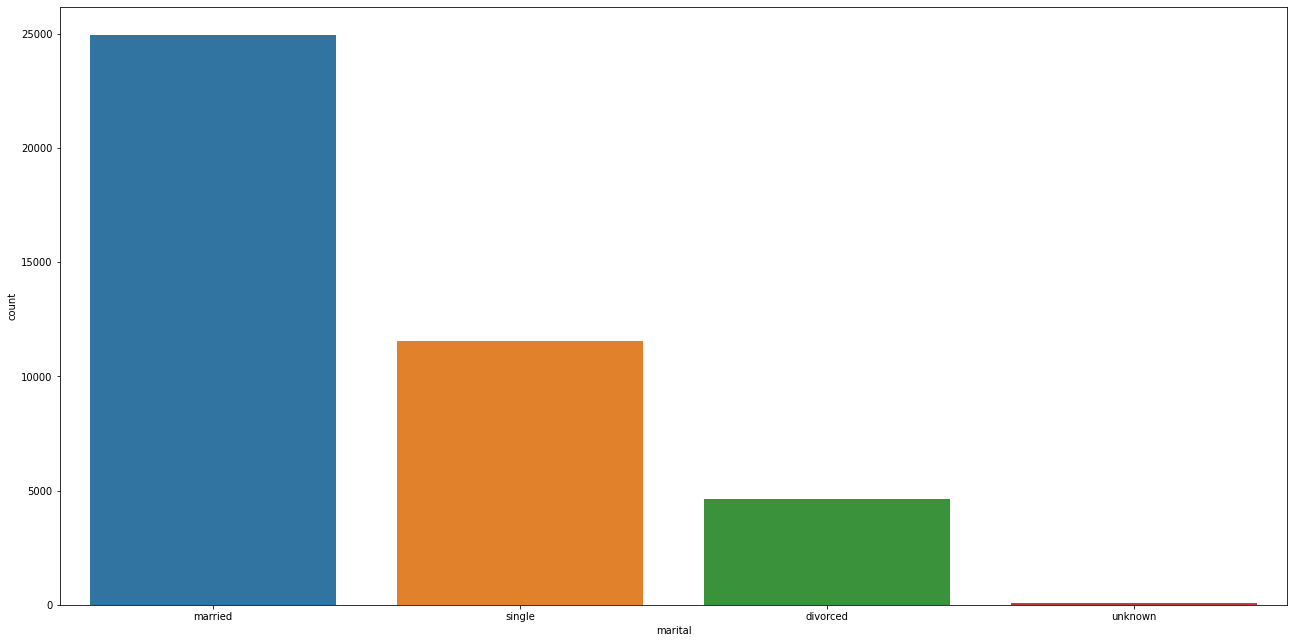

In [144]:
sns.countplot(x='marital',data=df_sub) # A Countplot of Marital Status

In [31]:
print("Married %  -> ",round(100*len(df_sub[df_sub['marital']=="married"])/len(df_sub),3))
print("Single %   -> ",round(100*len(df_sub[df_sub['marital']=="single"])/len(df_sub),3))
print("Divorced % -> ",round(100*len(df_sub[df_sub['marital']=="divorced"])/len(df_sub),3))
print("Unknown %  -> ",round(100*len(df_sub[df_sub['marital']=="unknown"])/len(df_sub),3))

Married %  ->  60.522
Single %   ->  28.086
Divorced % ->  11.197
Unknown %  ->  0.194


### Education

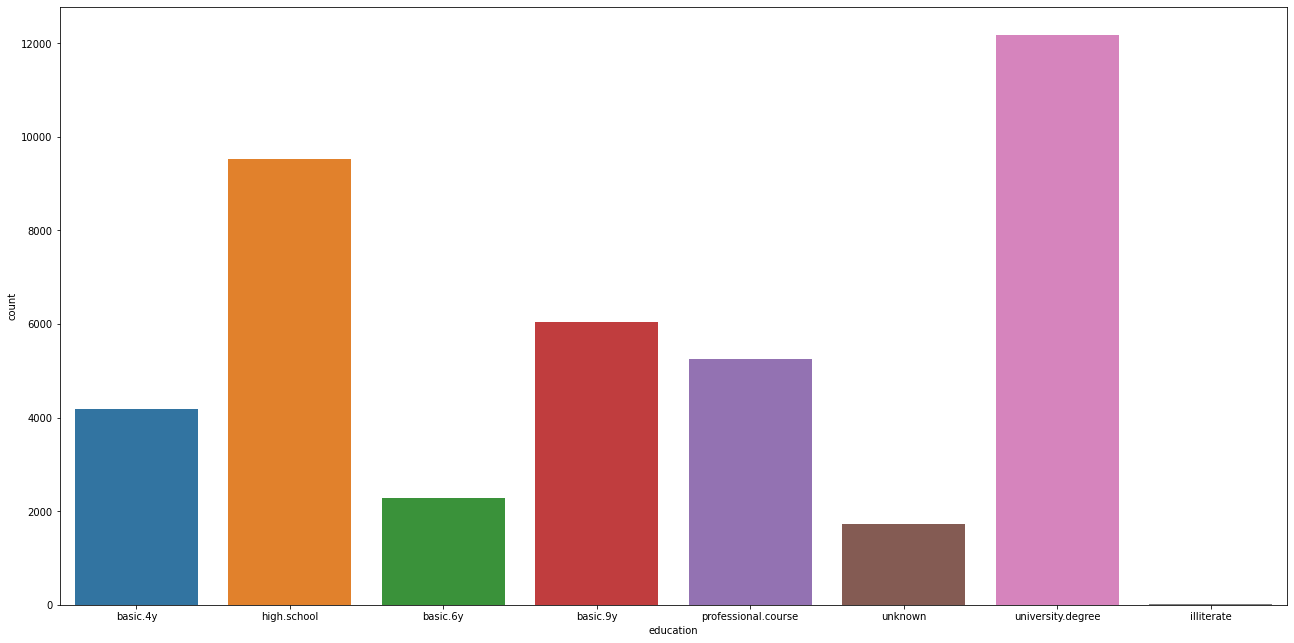

In [145]:
sns.countplot(x='education',data=df_sub) # A Countplot of Educational Status

In [33]:
print("Basic 4y %             -> ",round(100*len(df_sub[df_sub['education']=="basic.4y"])/len(df_sub),3))
print("High School %          -> ",round(100*len(df_sub[df_sub['education']=="high.school"])/len(df_sub),3))
print("Basic 6y %             -> ",round(100*len(df_sub[df_sub['education']=="basic.6y"])/len(df_sub),3))
print("Basic 9y %             -> ",round(100*len(df_sub[df_sub['education']=="basic.9y"])/len(df_sub),3))
print("Professional Course %  -> ",round(100*len(df_sub[df_sub['education']=="professional.course"])/len(df_sub),3))
print("Unknown %              -> ",round(100*len(df_sub[df_sub['education']=="unknown"])/len(df_sub),3))
print("University Degree %    -> ",round(100*len(df_sub[df_sub['education']=="university.degree"])/len(df_sub),3))
print("Illiterate %           -> ",round(100*len(df_sub[df_sub['education']=="illiterate"])/len(df_sub),3))

Basic 4y %             ->  10.139
High School %          ->  23.101
Basic 6y %             ->  5.565
Basic 9y %             ->  14.677
Professional Course %  ->  12.729
Unknown %              ->  4.203
University Degree %    ->  29.543
Illiterate %           ->  0.044


### Default, Housing, Loan

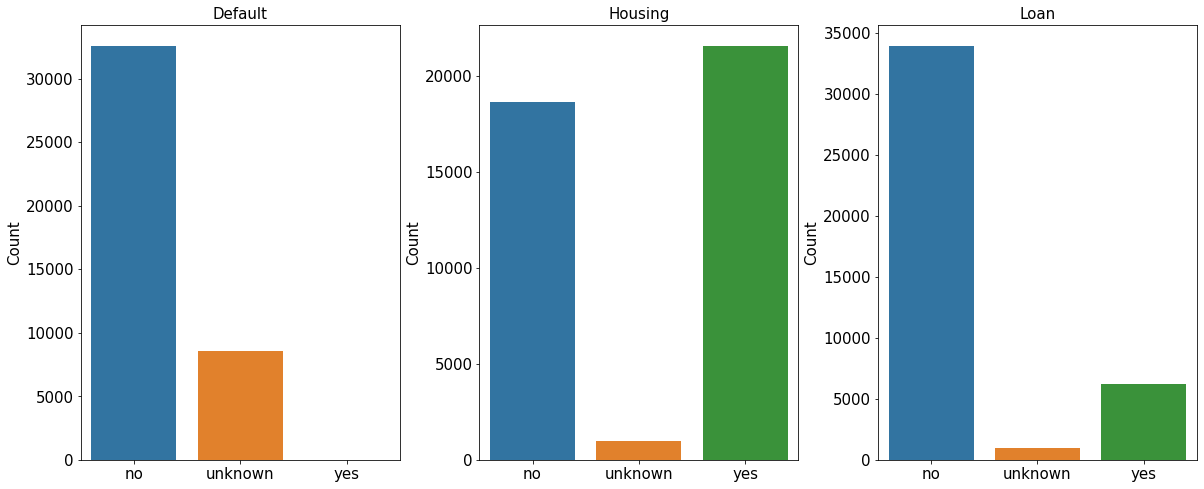

In [34]:
# Default -> Credit In default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df_sub, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing -> Housing Loan
sns.countplot(x = 'housing', data = df_sub, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan -> Personal Loan
sns.countplot(x = 'loan', data = df_sub, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [35]:
print("Default Info")
print("NO %      -> ",round(100*len(df_sub[df_sub['default']=="no"])/len(df_sub),3))
print("Unknown % -> ",round(100*len(df_sub[df_sub['default']=="unknown"])/len(df_sub),3))
print("Yes %     -> ",round(100*len(df_sub[df_sub['default']=="yes"])/len(df_sub),3))
print("")
print("Housing Info")
print("NO %      -> ",round(100*len(df_sub[df_sub['housing']=="no"])/len(df_sub),3))
print("Unknown % -> ",round(100*len(df_sub[df_sub['housing']=="unknown"])/len(df_sub),3))
print("Yes %     -> ",round(100*len(df_sub[df_sub['housing']=="yes"])/len(df_sub),3))
print("")
print("Loan Info")
print("NO %      -> ",round(100*len(df_sub[df_sub['loan']=="no"])/len(df_sub),3))
print("Unknown % -> ",round(100*len(df_sub[df_sub['loan']=="unknown"])/len(df_sub),3))
print("Yes %     -> ",round(100*len(df_sub[df_sub['loan']=="yes"])/len(df_sub),3))

Default Info
NO %      ->  79.12
Unknown % ->  20.873
Yes %     ->  0.007

Housing Info
NO %      ->  45.212
Unknown % ->  2.404
Yes %     ->  52.384

Loan Info
NO %      ->  82.427
Unknown % ->  2.404
Yes %     ->  15.169


In [36]:
# Converting Categorical to Numerical Integers
LE = LabelEncoder()
df_sub['job']      = LE.fit_transform(df_sub['job']) 
df_sub['marital']  = LE.fit_transform(df_sub['marital']) 
df_sub['education']= LE.fit_transform(df_sub['education']) 
df_sub['default']  = LE.fit_transform(df_sub['default']) 
df_sub['housing']  = LE.fit_transform(df_sub['housing']) 
df_sub['loan']     = LE.fit_transform(df_sub['loan']) 

In [37]:
def GroupAge(col): # As Age is Not restricted to few values we will Group it into Categories
  if col<=32: # Below 1st Quartile
    return 1
  elif col>32 and col<=47: # Between 2nd & 3rd Quartile
    return 2
  elif col>47 and col<=70: # Between  3rd & 4th Quartile
    return 3
  elif col>70 and col<=98: # Between 4th Quartile & Outlier Value calculated above
    return 4

In [38]:
df_sub['age']=df_sub['age'].apply(GroupAge)

In [39]:
df_sub.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [40]:
df_sub['age'].unique() # Converted Age to 4 Groups/Categories

array([3, 2, 1, 4])

In [146]:
df1=df.iloc[:,7:11] # Info about 'contact', 'month', 'day_of_week' & 'duration'
df1.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [42]:
df1['contact'].unique() # 2 Types of Contacts

array(['telephone', 'cellular'], dtype=object)

In [43]:
df1['month'].unique() # 10 Months

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [44]:
df1['day_of_week'].unique() # 5 weekdays

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

### Duration

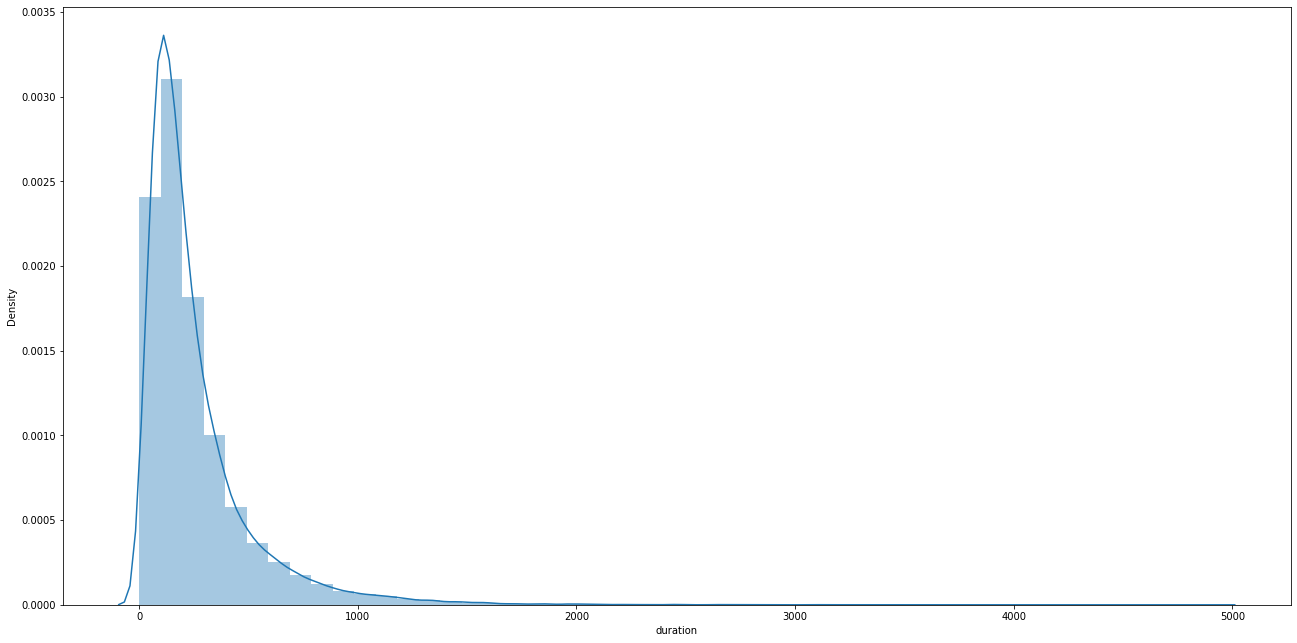

In [147]:
sns.distplot(df1['duration']) # A Distribution Plot of Duration(In Seconds) with Density 

In [46]:
round(df1['duration'].max()/60,3) # Maximum Duration of Call in Minutes

81.967

In [47]:
round(df1['duration'].min()/60,3) # Minimum Duration of Call in Minutes

0.0

In [48]:
round(df1['duration'].mean()/60,3) # Average Duration of Call in Minutes

4.305

In [49]:
round(df1['duration'].std()/60,3) # Standard Deviation of Duration of Call

4.321

 ### Contact

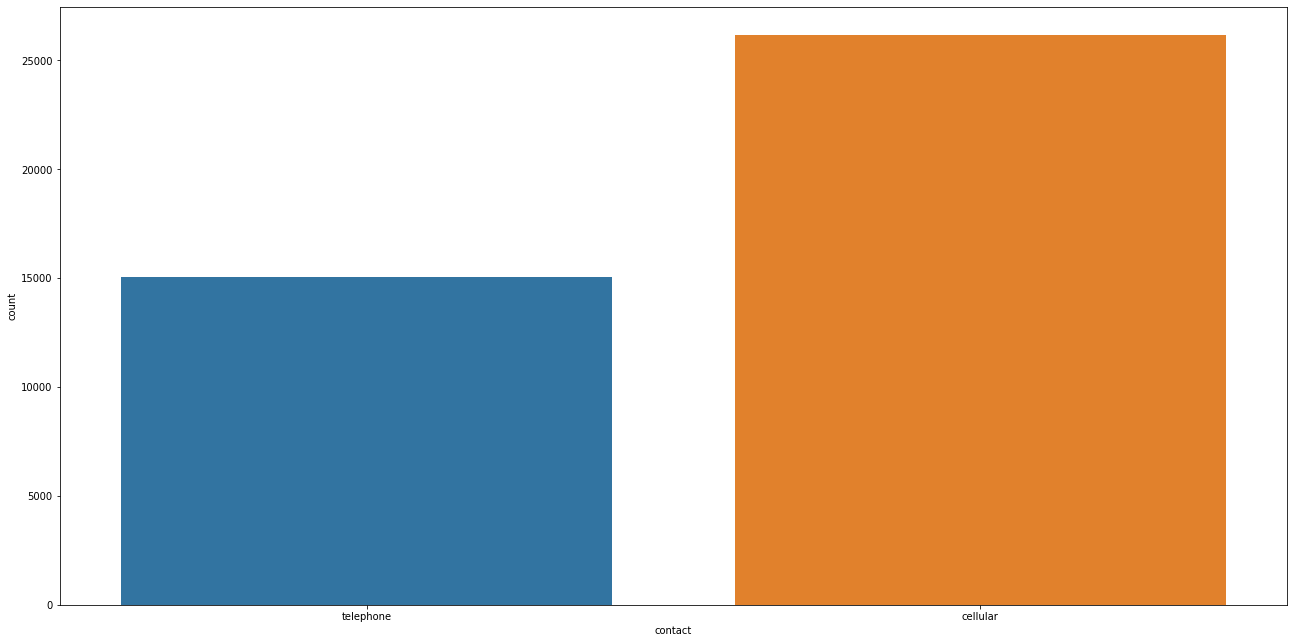

In [148]:
sns.countplot(x='contact',data=df1) # A Countplot of Contact Type

In [51]:
print("Telephone % -> ",round(100*len(df1[df1['contact']=="telephone"])/len(df1),3))
print("Cellular %  -> ",round(100*len(df1[df1['contact']=="cellular"])/len(df1),3))

Telephone % ->  36.525
Cellular %  ->  63.475


### Month

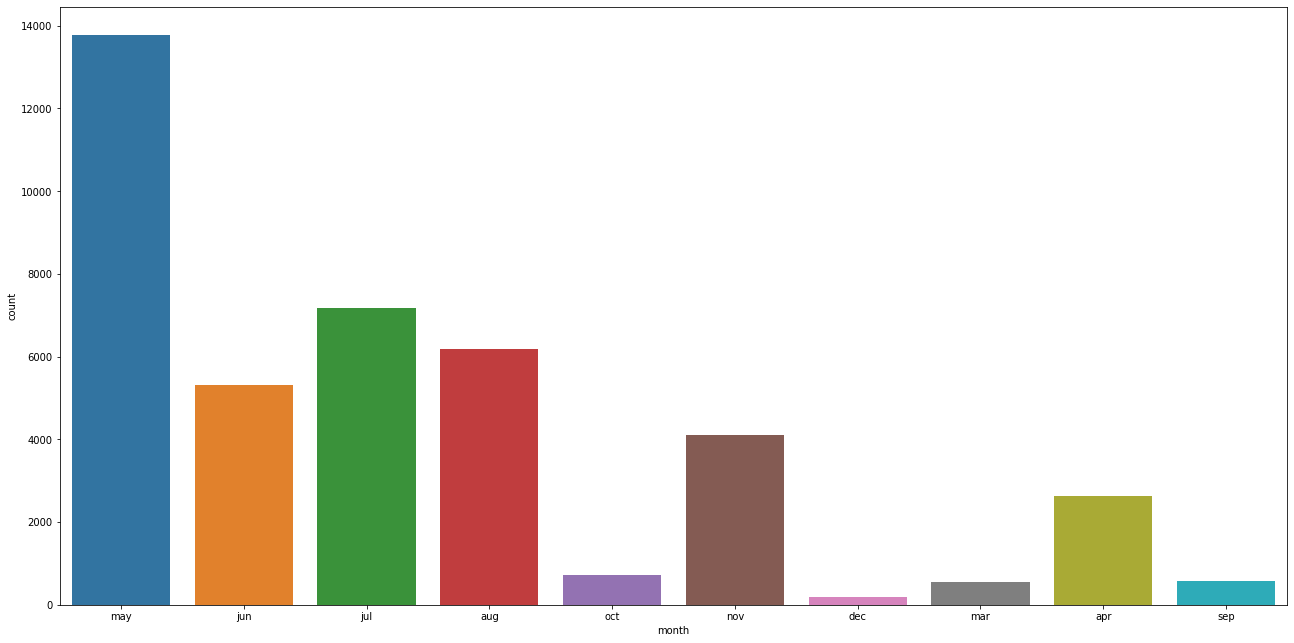

In [149]:
sns.countplot(x='month',data=df1) # A Countplot of Contact Type

In [53]:
print("May %       -> ",round(100*len(df1[df1['month']=="may"])/len(df1),3))
print("June %      -> ",round(100*len(df1[df1['month']=="jun"])/len(df1),3))
print("July %      -> ",round(100*len(df1[df1['month']=="jul"])/len(df1),3))
print("August %    -> ",round(100*len(df1[df1['month']=="aug"])/len(df1),3))
print("October %   -> ",round(100*len(df1[df1['month']=="oct"])/len(df1),3))
print("November%   -> ",round(100*len(df1[df1['month']=="nov"])/len(df1),3))
print("December %  -> ",round(100*len(df1[df1['month']=="dec"])/len(df1),3))
print("March %     -> ",round(100*len(df1[df1['month']=="mar"])/len(df1),3))
print("April %     -> ",round(100*len(df1[df1['month']=="apr"])/len(df1),3))
print("September % -> ",round(100*len(df1[df1['month']=="sep"])/len(df1),3))

May %       ->  33.43
June %      ->  12.912
July %      ->  17.418
August %    ->  15.0
October %   ->  1.743
November%   ->  9.957
December %  ->  0.442
March %     ->  1.326
April %     ->  6.39
September % ->  1.384


### Day Of Week

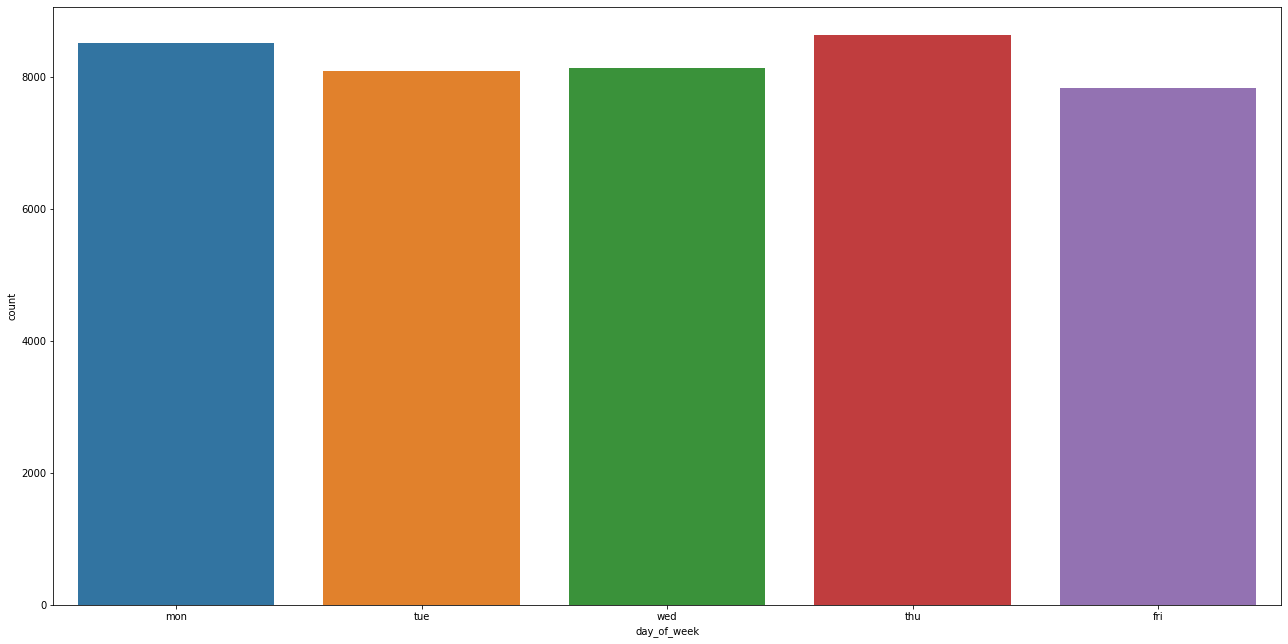

In [150]:
sns.countplot(x='day_of_week',data=df1) # A Countplot of Contact Type

In [55]:
print("Monday %    -> ",round(100*len(df1[df1['day_of_week']=="mon"])/len(df1),3))
print("Tuesday %   -> ",round(100*len(df1[df1['day_of_week']=="tue"])/len(df1),3))
print("Wednesday % -> ",round(100*len(df1[df1['day_of_week']=="wed"])/len(df1),3))
print("Thursday %  -> ",round(100*len(df1[df1['day_of_week']=="thu"])/len(df1),3))
print("Friday %    -> ",round(100*len(df1[df1['day_of_week']=="fri"])/len(df1),3))

Monday %    ->  20.671
Tuesday %   ->  19.642
Wednesday % ->  19.748
Thursday %  ->  20.936
Friday %    ->  19.003


In [56]:
# Converting Categorical to Numerical Integers
LE = LabelEncoder()
df1['contact'] = LE.fit_transform(df1['contact']) 
df1['month'] = LE.fit_transform(df1['month']) 
df1['day_of_week'] = LE.fit_transform(df1['day_of_week'])

In [57]:
df1.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [58]:
# Quartiles Needed to Calculate the Outliers
print('1st Quartile: ', df1['duration'].quantile(q = 0.25)) # 1st Quartile
print('2nd Quartile: ', df1['duration'].quantile(q = 0.50)) # 2nd Quartile
print('3rd Quartile: ', df1['duration'].quantile(q = 0.75)) # 3rd Quartile
print('4th Quartile: ', df1['duration'].quantile(q = 1.00)) # 4th Quartile
# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Outliers: ', df1['duration'].quantile(q = 0.75) + 1.5*(df1['duration'].quantile(q = 0.75) - df1['duration'].quantile(q = 0.25)))

1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
Outliers:  644.5


In [59]:
def GroupDuration(col): # As Duration is Not restricted to few values we will Group it into Categories
  if col<=102: # Below 1st Quartile
    return int(1)
  elif col>102 and col<=180: # Between 1st & 2nd Quartile
    return int(2)
  elif col>180 and col<=319: # Between 2nd & 3rd Quartile
    return int(3)
  elif col>319 and col<=644.5: # Between 3rd & 4th Quartile
    return int(4)
  elif col>644.5: # After 4th Quartile
    return int(5)

In [60]:
df1['duration']=df1['duration'].apply(GroupDuration)

In [61]:
df1.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


### Campaign, Pdays, Previous & Poutcome

In [62]:
df11 = df.loc[:,['campaign', 'pdays','previous', 'poutcome']]
df11.head() # Convert the poutcome to Integers


,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [63]:
df11['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [64]:
df11['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

### Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed

In [65]:
df2 = df.loc[:,['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] 
df2.head() # All are numbers, so no need to worry

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# Model

In [66]:
df_final= pd.concat([df_sub, df1, df2, df11], axis = 1)
df_final = df_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
df_final.shape

(41188, 20)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size = 0.2)

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [78]:
lm = LogisticRegression() # Logistic Regression Model
lm.fit(X_train,y_train)
lmpred = lm.predict(X_test)


print(confusion_matrix(y_test, lmpred))
print(round(accuracy_score(y_test, lmpred),4)*100)

[[7106  173]
 [ 618  341]]
90.4


### K-Nearest-Neighbors

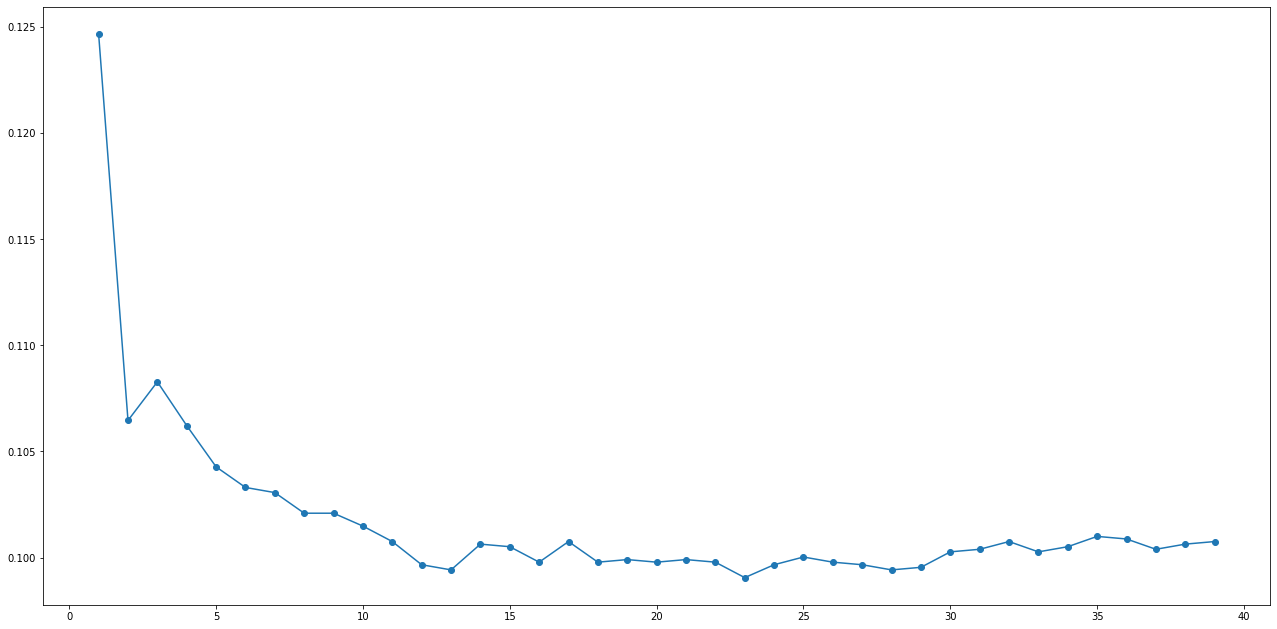

In [82]:
# Elbow Method to find Good 'K' Value
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  pred_i=pred_i.reshape(8238,1)
  error_rate.append(np.mean(pred_i!=y_test))
plt.plot(range(1,40),error_rate,marker='o')

In [88]:
for i in range(11,25):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  pred_i=pred_i.reshape(8238,1)
  # print(confusion_matrix(y_test,pred_i))
  # print(classification_report(y_test,pred_i))
  print(i ,round(accuracy_score(y_test, pred_i),4)*100)

11 89.92
12 90.03
13 90.06
14 89.94
15 89.95
16 90.02
17 89.92
18 90.02
19 90.01
20 90.02
21 90.01
22 90.02
23 90.09
24 90.03


In [89]:
# Good 'K' Value -> 23

In [90]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(round(accuracy_score(y_test, knn_pred),4)*100)

[[7150  129]
 [ 687  272]]
90.09


### Support Vector Machine

In [97]:
svc_model= SVC() # Kernel Default -> ’RBF’ Radial basis function
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
print(round(accuracy_score(y_test, svc_pred),4)*100)

[[7149  130]
 [ 670  289]]
90.29


### Decision Tree

In [98]:
dt = DecisionTreeClassifier(criterion='gini') 
# Gini index function is used as an indication of how ‘pure’ the leaf nodes are (how mixed the training data assigned to each node is).
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print(confusion_matrix(y_test, dt_pred))
print(round(accuracy_score(y_test, dt_pred),4)*100)

[[6799  480]
 [ 491  468]]
88.21


### Random Forest

In [114]:
rfc = RandomForestClassifier(n_estimators = 600)
# n_estimators -> Number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower.
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred ))
print(round(accuracy_score(y_test, rfc_pred),5)*100)

[[7002  277]
 [ 502  457]]
90.544


### Gaussian Naive Bayes

In [115]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test, gnb_pred ))
print(round(accuracy_score(y_test, gnb_pred),4)*100)
# Expected Gaussian Naive Bayes to perform the worst as it makes the assumption that variables are independent of each other

[[6451  828]
 [ 433  526]]
84.69


### XGBClassifier

In [116]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, xgb_pred ))
print(round(accuracy_score(y_test, xgb_pred),4)*100)

[[7046  233]
 [ 516  443]]
90.91


### GradientBoostingClassifier

In [118]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, gbc_pred ))
print(round(accuracy_score(y_test, gbc_pred),4)*100)

[[7023  256]
 [ 487  472]]
90.98


In [131]:
# So, we have seen multiple models perform on the Dataset.
# Lets compile them together and compare them.
print("GradientBoostingClassifier Accuracy % ->",round(accuracy_score(y_test, gbc_pred),4)*100)
print("XGBClassifier Accuracy %              ->",round(accuracy_score(y_test, xgb_pred),4)*100)
print("Random Forest Accuracy %              ->",round(accuracy_score(y_test, rfc_pred),5)*100)
print("Logistic Regression Accuracy %        ->",round(accuracy_score(y_test, lmpred),4)*100)
print("Support Vector Machine %              ->",round(accuracy_score(y_test, svc_pred),4)*100)
print("K-Nearest-Neighbors Accuracy %        ->",round(accuracy_score(y_test, knn_pred),4)*100)
print("Decision Tree Accuracy %              ->",round(accuracy_score(y_test, dt_pred),4)*100)
print("Gaussian Naive Bayes Accuracy %       ->",round(accuracy_score(y_test, gnb_pred),4)*100)

GradientBoostingClassifier Accuracy % -> 90.98
XGBClassifier Accuracy %              -> 90.91
Random Forest Accuracy %              -> 90.544
Logistic Regression Accuracy %        -> 90.4
Support Vector Machine %              -> 90.29
K-Nearest-Neighbors Accuracy %        -> 90.09
Decision Tree Accuracy %              -> 88.21
Gaussian Naive Bayes Accuracy %       -> 84.69
